# S07 T01: Tasca del test d'hipòtesis

## Descripció

#### Aprèn a realitzar test d'hipòtesis amb Python

### Exercici 1

#### Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

#### Importem llibreries

In [30]:
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from statistics import mode
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats

#### Carreguem les dades del dataset

In [184]:
traf=pd.read_excel('datatrafico.xls', index_col=0)
traf.head()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Fe_Al,ID_Ses,ID_Us,ID_Neg,ID_Emp,ID_Cont,EsCli,EsTrabajador,EsProv,EsAdm,...,ID_Apa,ID_Aci,EsSet,ID_App,EsGlobal,ErrVali,ID_TrafI,Hora,SinDat,Test
ID_TrafO,,,,,,,,,,,,,,,,,,,,,
84495,2022-05-31 07:03:25.420000000,0,0,80,0,0,0,-1,0,0,...,11,3448,0,4,-1,0,84497,7,0,0
84529,2022-05-31 07:03:35.553000000,0,0,80,0,0,0,-1,0,0,...,448,3454,0,4,-1,0,84530,7,0,0
87842,2022-05-31 07:19:55.297000000,3891718,10880,40,0,0,0,-1,0,-1,...,34,80,0,1,0,0,87838,7,0,0
87854,2022-05-31 07:19:59.003000000,3891718,10880,40,0,0,0,-1,0,-1,...,153,858,0,1,0,0,87855,7,0,0
102126,2022-05-31 08:30:39.293000000,3891888,6641,55,0,0,0,-1,0,0,...,65,258,0,1,0,0,102127,8,0,0


#### Descripción de les columnes

In [185]:
print(traf.columns.tolist())

['Fe_Al', 'ID_Ses', 'ID_Us', 'ID_Neg', 'ID_Emp', 'ID_Cont', 'EsCli', 'EsTrabajador', 'EsProv', 'EsAdm', 'EsAgente', 'EsTecnico', 'Durada', 'BytesI', 'BytesO', 'BytesOsl', 'IP', 'ID_Idi', 'IsPost', 'ID_Modulo', 'ID_Apa', 'ID_Aci', 'EsSet', 'ID_App', 'EsGlobal', 'ErrVali', 'ID_TrafI', 'Hora', 'SinDat', 'Test']


- Fe_Al: Data i hora de la petició
- ID_Ses: Nº de sessió. El nº de sessió nomes es fa servir per acces vía web
- ID_Us: Indica l'usuari, en cas que estigui registrat
- ID_Neg: Identifica el negoci des del que s'ha fet la petició
- ID_Emp: Idenfitica la empresa que ha fet la petició
- ID_Cont: Indenfitica el contacte que ha fet la petició
- EsCli: Indica si le empresa es client
- EsTrabajador: Indica si el usuari es treballador del negoci
- EsProv: Indica si le empresa es un proveïdor
- EsAdm: Indica si l'usuari que ha fet la petició ho ha fet com administrador
- EsAgente: Indica si l'usuari que ha fet la petició ho ha fet com agent
- EsTecnico: Indica si l'usuari que ha fet la petició ho ha fet com a tecnic
- Durada: Durada en milisegons del temps que ha tardar en retorna la petició el servidor
- BytesI: nº de bytes que s'han enviat al servidor per fer la petició
- BytesO: nº de bytes que s'han retornat del servidor a la petició que ha fet l'usuari
- BytesOsl: nº de bytes que s'han retornat del servidor a la petició que ha fet l'usuari menys la longitud de la url
- IP: IP des d'on ha vingut la petició
- ID_Idi: Identificador de l'idioma
- IsPost: 0 es Get i 1 es Post, per detectar les peticions de lectura i escriptura
- ID_Modulo: Identifica el modul al que pertany aquesta petició
- ID_Apa: Identifica el apartat del modul al que pertany aquesta petició
- ID_Aci: Identifica el tipus de petició
- EsSet: Identifica si la petició es de consulta o de gravació de dades
- ID_App: Identifica des de quina aplicació s'ha fer la petició
- EsGlobal: Indica si la petició es Global
- ErrVali: Identifica si hi ha hagut un error de validació
- ID_TrafI: Identificador per vincular les dades amb un altre taula
- Hora: Valor enter amb l'hora de la petició
- SinDat: Petició sense dades
- Test: Indica si la petició es va fer dins d'un entorn de prova


In [186]:
print("Nº de registres: " + str(len(traf)))
print("Tipus de dades de les columnes:\n" + str(traf.dtypes))

Nº de registres: 22418
Tipus de dades de les columnes:
Fe_Al            object
ID_Ses            int64
ID_Us             int64
ID_Neg            int64
ID_Emp            int64
ID_Cont           int64
EsCli             int64
EsTrabajador      int64
EsProv            int64
EsAdm             int64
EsAgente          int64
EsTecnico         int64
Durada          float64
BytesI            int64
BytesO            int64
BytesOsl          int64
IP               object
ID_Idi            int64
IsPost            int64
ID_Modulo         int64
ID_Apa            int64
ID_Aci            int64
EsSet             int64
ID_App            int64
EsGlobal          int64
ErrVali           int64
ID_TrafI          int64
Hora              int64
SinDat            int64
Test              int64
dtype: object


#### Redefinim el tipus de columna al que li correspont per l'origen de les dades

In [187]:
traf['EsCli'] = traf['EsCli'].astype(bool)
traf['EsTrabajador'] = traf['EsTrabajador'].astype(bool)
traf['EsProv'] = traf['EsProv'].astype(bool)
traf['EsAdm'] = traf['EsAdm'].astype(bool)
traf['EsAgente'] = traf['EsAgente'].astype(bool)
traf['EsTecnico'] = traf['EsTecnico'].astype(bool)
traf['IsPost'] = traf['IsPost'].astype(bool)
traf['EsSet'] = traf['EsSet'].astype(bool)
traf['EsGlobal'] = traf['EsGlobal'].astype(bool)
traf['ErrVali'] = traf['ErrVali'].astype(bool)
traf['SinDat'] = traf['SinDat'].astype(bool)
traf['Test'] = traf['Test'].astype(bool)
traf['IP'] = traf['IP'].astype('string')
traf['Fe_Al']= pd.to_datetime(traf['Fe_Al'])
print("Tipus de dades de les columnes canviades:\n" + str(traf.dtypes))

Tipus de dades de les columnes canviades:
Fe_Al           datetime64[ns]
ID_Ses                   int64
ID_Us                    int64
ID_Neg                   int64
ID_Emp                   int64
ID_Cont                  int64
EsCli                     bool
EsTrabajador              bool
EsProv                    bool
EsAdm                     bool
EsAgente                  bool
EsTecnico                 bool
Durada                 float64
BytesI                   int64
BytesO                   int64
BytesOsl                 int64
IP                      string
ID_Idi                   int64
IsPost                    bool
ID_Modulo                int64
ID_Apa                   int64
ID_Aci                   int64
EsSet                     bool
ID_App                   int64
EsGlobal                  bool
ErrVali                   bool
ID_TrafI                 int64
Hora                     int64
SinDat                    bool
Test                      bool
dtype: object


#### Revisem els valors nulls de les columnes

In [188]:
traf.isnull().sum()

Fe_Al              0
ID_Ses             0
ID_Us              0
ID_Neg             0
ID_Emp             0
ID_Cont            0
EsCli              0
EsTrabajador       0
EsProv             0
EsAdm              0
EsAgente           0
EsTecnico          0
Durada             0
BytesI             0
BytesO             0
BytesOsl           0
IP              1294
ID_Idi             0
IsPost             0
ID_Modulo          0
ID_Apa             0
ID_Aci             0
EsSet              0
ID_App             0
EsGlobal           0
ErrVali            0
ID_TrafI           0
Hora               0
SinDat             0
Test               0
dtype: int64

#### Conclusió: Veiem que hi ha algun valor null al camp IP, però en aquest exercici no farem servir aquest camp, així que el deixem

#### H0 : La hipotesis nula es que el promig de la durada de les peticions del negoci 70 es menor que el promig de tots els altres negocis

#### H1 : La hipòtesis alternativa es que el promig de la durada de les peticions del negoci 70 son majors o iguals que el promig de tots els altres negocis

#### Preparem el dataset que volem fer servir. 

In [189]:
traf2=traf[['ID_Neg','Durada','BytesO','BytesI','Hora']]
altres_negocis = traf2[traf2['ID_Neg'] != 70]
print(altres_negocis.describe())
negoci = traf2[traf2['ID_Neg'] == 70]
print(negoci.describe())

            ID_Neg        Durada        BytesO         BytesI         Hora
count  7974.000000   7974.000000  7.974000e+03    7974.000000  7974.000000
mean     60.397793    247.706642  7.186016e+03    1193.700025    13.165789
std      17.089689    660.361109  1.258051e+05   12579.707537     3.315903
min       0.000000      0.498400  4.770000e+02     662.000000     6.000000
25%      55.000000     72.737075  8.370000e+02     801.000000    10.000000
50%      55.000000    161.383450  1.618000e+03     838.000000    12.000000
75%      80.000000    279.746650  2.970000e+03     946.000000    16.000000
max      80.000000  28143.897500  1.046741e+07  929113.000000    21.000000
        ID_Neg        Durada         BytesO         BytesI          Hora
count  14444.0  14444.000000   14444.000000   14444.000000  14444.000000
mean      70.0    459.763105    6165.480961    1227.444614     12.547078
std        0.0   1291.619112   11427.442261   11385.989792      3.138862
min       70.0      0.047400     

#### Per dicidir quin tipus de prova fer, primer tenim que saber si la distribució de les dades es normal o no

#### Fem servir la prova de Shapiro-Wilk, que prova la hipòtesis nula de que les dades segueixen una distribució normal (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) 

In [229]:
from scipy.stats import shapiro

stat, p_valor = shapiro(traf2['Durada'].sample(n=5000, random_state=42)) # La prova te un limit de mostres, així que agafem 5000 registres
print("El valor p es: " + str(p_valor))

alfa = 0.05
if p_valor < alfa:
   print('La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.')
else:
   print('La mostra sembla normal (o Gaussiana), no es refusa la hipótesis nula H0. Los dades es distribueixen normalment.')



El valor p es: 0.0
La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.


#### Com que la distribució no es normal, fem servir la prova Wilcoxon, que permet fer proves d'hipòtesis amb una mostra no paramètrica

In [230]:
from scipy.stats import wilcoxon

stat, p_valor = wilcoxon(negoci['Durada'] - altres_negocis.Durada.mean(),alternative = 'greater')
print("El valor p es " + str(p_valor))
alfa = 0.05
if p_valor < alfa:
    print('No podem refusar la hipótesis nula amb un nivell de confiança del 95%')
else:
    print('Refusem la hipótesis nula amb un nivell de confiança del 95%, acceptem la hipòtesis alternativa')


El valor p es 0.0
No podem refusar la hipótesis nula amb un nivell de confiança del 95%


#### Ara representarem la forma de les dades dels dos grups, td_neg (Negocio 70) i td_alneg (Altres negocis)

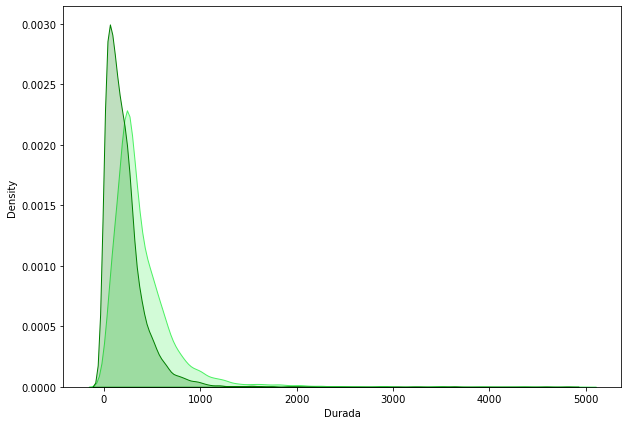

In [231]:
td_neg=negoci.loc[negoci['Durada'] <= 5000]
td_alneg=altres_negocis.loc[altres_negocis['Durada'] <= 5000]
plt.figure(figsize= (10,7))
sns.kdeplot(td_neg['Durada'], label= 'var', color= '#4cf163', fill = True)
sns.kdeplot(td_alneg['Durada'], label= 'var', color= 'green', fill = True)
plt.show()

#### Tipo de distribuciones, https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm


### Exercici 2

#### Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%

#### Ara volem provar que la durada de les peticions del mati i de la tarda son diferents, així compararem la durada per veure su hi ha una diferencia significativa.

#### Afagirem un camp nou al dataset per dividir el dia entre mati i tarda. Agafarem de 2h a 14h com a mati, i de 14h a 2h com a tarda

In [234]:
traf['Mati'] = np.where((traf['Hora']>2) & (traf['Hora']<=14), True, False)

#### Generem el grup mati i el grup tarda, amb una mostra de 1000 registres

In [235]:
mati=traf.loc[traf['Mati'] == True].apply(lambda x: x.sample(1000, random_state = 42))
tarda=traf.loc[traf['Mati'] == False].apply(lambda x: x.sample(1000, random_state = 42))
len_mati=len(mati)
len_tarda=len(tarda)
print("Hi han " + str(len_mati) + " registres pel mati" )
print("Hi han " + str(len_tarda) + " registres per la tarda" )

Hi han 1000 registres pel mati
Hi han 1000 registres per la tarda


#### Fem servir la prova de Shapiro-Wilk, que prova la hipòtesis nula de que les dades segueixen una distribució normal del grup del mati

In [236]:
stat, p_valor = shapiro(mati['Durada'])
print("El valor p es: " + str(p_valor))

alfa = 0.05
if p_valor < alfa:
   print('La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.')
else:
   print('La mostra sembla normal (o Gaussiana), no es refusa la hipótesis nula H0. Los dades es distribueixen normalment.')


El valor p es: 0.0
La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.


#### Fem servir la prova de Shapiro-Wilk, que prova la hipòtesis nula de que les dades segueixen una distribució normal del grup de la tarda

In [237]:
stat, p_valor = shapiro(tarda['Durada'])
print("El valor p es: " + str(p_valor))

alfa = 0.05
if p_valor < alfa:
   print('La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.')
else:
   print('La mostra sembla normal (o Gaussiana), no es refusa la hipótesis nula H0. Los dades es distribueixen normalment.')


El valor p es: 0.0
La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.


#### Com que la distribució no es normal, fem servir la prova U de Whitney, que permet fer proves d'hipòtesis amb dos mostres no paramètriques

#### H0 : Prova que la durada de les peticions del mati i de la tarda son diferents

#### H1 : Prova que la durada de les peticions del mati i de la tada son iguals

In [238]:
from scipy.stats import ttest_ind

stat, p_valor = ttest_ind(mati['Durada'],tarda['Durada'])
print("El valor p es: " + str(p_valor))

alfa = 0.05
if p_valor > alfa:
    print('No rebutjem la hipòtesi nul·la amb un nivell de confiança del 95%.')
else:
    print('Rebutjem la hipòtesi nul·la al nivell de confiança del 95%, acceptem la hipòtesi alternativa')

El valor p es: 0.9170328146107872
No rebutjem la hipòtesi nul·la amb un nivell de confiança del 95%.


#### Amb un nivell de significancia del 95% podem refusar la hipòtesis nula de que la la duara de les peticions es diferent del mati envers la tarda

#### Ara represemtem la forma de les dades amb un gràfica

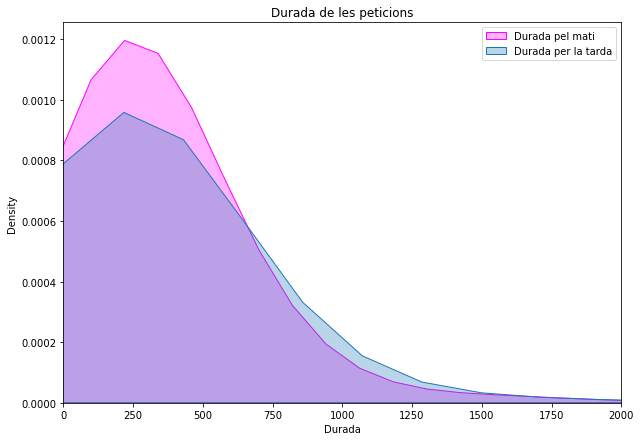

In [239]:
f, ax = plt.subplots(figsize= (10,7))
sns.kdeplot(mati['Durada'], label= 'Durada pel mati',
color= 'magenta', fill = True, alpha = 0.30, ax=ax)
sns.kdeplot(tarda['Durada'], label= 'Durada per la tarda',
fill = True, alpha= 0.30,ax=ax)
ax.set_xlim((0,2000))
plt.title('Durada de les peticions')
plt.legend()
plt.show()

#### Exercici 3

#### Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%

#### Ara volem provar que la durada de les peticions del mati, de la tarda i de la nit son diferents, així compararem la durada per veure su hi ha una diferencia significativa.

#### Afagirem un camp nou al dataset per dividir el dia entre mati, tarda i nit. Agafarem de 10h a 14h com a mati, de 14h a 20h com a tarda i de 20h a 10h com a nit

In [240]:
def flagger(row):
    # 20 a 10 = tall 1
    # 10 a 14 = tall 2
    # 14 a 20 = tall 3
    
    t1=10
    
    _tall=1
    if row['Hora']>10 & row['Hora']<=14:
        _tall=2
    if row['Hora']>14 & row['Hora']<=20:
        _tall=3
    return _tall

traf['tall'] = traf.apply(flagger, axis=1).astype(int)

#### Revisem que el tall de la nit tingui un mínim de mostres.

In [243]:
#Revisem que el tall de la nit tingui un minim de mostres
tall_nit=traf.loc[traf['tall'] == 1]
print("Tenim " +  str(len(tall_nit)) + " registres al tall de la nit.")


Tenim 4132 registres al tall de la nit.


#### Generem el grup mati, el grup tarda i el grup nit, amb una mostra de 1000 registres

In [244]:
tall_mati=traf.loc[traf['tall'] == 2].apply(lambda x: x.sample(1000, random_state = 42))
tall_tarda=traf.loc[traf['tall'] == 3].apply(lambda x: x.sample(1000, random_state = 42))
tall_nit=traf.loc[traf['tall'] == 1].apply(lambda x: x.sample(1000, random_state = 42))
len_tall_mati=len(tall_mati)
len_tall_tarda=len(tall_tarda)
len_tall_nit=len(tall_nit)
print("Hi han " + str(len_tall_mati) + " registres pel mati" )
print("Hi han " + str(len_tall_tarda) + " registres per la tarda" )
print("Hi han " + str(len_tall_nit) + " registres per la nit" )

Hi han 1000 registres pel mati
Hi han 1000 registres per la tarda
Hi han 1000 registres per la nit


In [245]:
stat, p_valor = shapiro(tall_mati['Durada'])
print("El valor p es: " + str(p_valor))

alfa = 0.05
if p_valor < alfa:
   print('La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.')
else:
   print('La mostra sembla normal (o Gaussiana), no es refusa la hipótesis nula H0. Los dades es distribueixen normalment.')


El valor p es: 0.0
La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.


In [246]:
stat, p_valor = shapiro(tall_tarda['Durada'])
print("El valor p es: " + str(p_valor))

alfa = 0.05
if p_valor < alfa:
   print('La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.')
else:
   print('La mostra sembla normal (o Gaussiana), no es refusa la hipótesis nula H0. Los dades es distribueixen normalment.')


El valor p es: 8.726738735745157e-34
La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.


In [247]:
stat, p_valor = shapiro(tall_nit['Durada'])
print("El valor p es: " + str(p_valor))

alfa = 0.05
if p_valor < alfa:
   print('La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.')
else:
   print('La mostra sembla normal (o Gaussiana), no es refusa la hipótesis nula H0. Los dades es distribueixen normalment.')


El valor p es: 0.0
La mostra no es normal (o Gaussiana), es refusa la hipòtesis nula H0. Les dades no es distribueixen normalment.


#### Com que la distribució no es normal, fem servir la prova de Friedman, que permet fer proves d'hipòtesis amb tres o mes mostres no paramètriques

#### H0 : Prova que la durada de les peticions del mati, de la tarda i de la nit son diferents

#### H1 : Prova que la durada de les peticions del mati, de la tadai de la nit  son iguals

In [249]:
test_stat, p_valor = stats.friedmanchisquare(tall_mati['Durada'],tall_tarda['Durada'],tall_nit['Durada'])
alfa = 0.05
if p_valor > alfa:
    print('No rebutjem la hipòtesi nul·la amb un nivell de confiança del 95%.')
else:
    print('Rebutjem la hipòtesi nul·la al nivell de confiança del 95%, acceptem la hipòtesi alternativa')

Rebutjem la hipòtesi nul·la al nivell de confiança del 95%, acceptem la hipòtesi alternativa


#### Amb un nivell de significancia del 95% podem refusar la hipòtesis nula de que la la duara de les peticions es diferent del mati envers la tarda i envers la nit

#### Ara represemtem la forma de les dades amb un gràfica

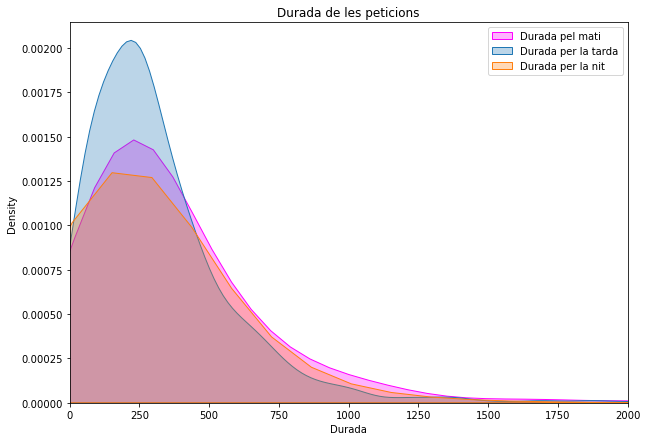

In [250]:
f, ax = plt.subplots(figsize= (10,7))
sns.kdeplot(tall_mati['Durada'], label= 'Durada pel mati',
color= 'magenta', fill = True, alpha = 0.30, ax=ax)
sns.kdeplot(tall_tarda['Durada'], label= 'Durada per la tarda',
fill = True, alpha= 0.30,ax=ax)
sns.kdeplot(tall_nit['Durada'], label= 'Durada per la nit',
fill = True, alpha= 0.30,ax=ax)
ax.set_xlim((0,2000))
#plt.axvline(x= tall_mati['Durada'].mean(), color = 'blue', ls = 'dotted')
#plt.axvline(x= tall_tarda['Durada'].mean(), color = 'red', ls = 'dotted')
#plt.axvline(x= tall_nit['Durada'].mean(), color = 'green', ls = 'dotted')
plt.title('Durada de les peticions')
plt.legend()
plt.show()

#### Conclusió: La durada de les peticions no canvien en les tres franjes horaries